In [ ]:
Nicholas Chludzinski

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.calibration import CalibratedClassifierCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score

In [2]:
# Load the CSV file
file_path = '/Users/nicho/Downloads/lung.csv'
data = pd.read_csv(file_path)

# Remove trailing spaces from the DataFrame column names
data.columns = data.columns.str.strip()

# Encode categorical variables
label_encoder = LabelEncoder()
data['GENDER'] = label_encoder.fit_transform(data['GENDER'])  # M -> 1, F -> 0
data['LUNG_CANCER'] = label_encoder.fit_transform(data['LUNG_CANCER'])  # YES -> 1, NO -> 0

# Separate features and target variable
X = data.drop(columns=['LUNG_CANCER'])
y = data['LUNG_CANCER']

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Logistic Regression model and include probability calibration
log_reg_model = LogisticRegression(max_iter=1000, random_state=42)
calibrated_log_reg_model = CalibratedClassifierCV(log_reg_model, method='sigmoid')
calibrated_log_reg_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = calibrated_log_reg_model.predict(X_test)
y_prob = calibrated_log_reg_model.predict_proba(X_test)[:, 1] 

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_prob)

# Print evaluation results
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"ROC-AUC Score: {roc_auc}")

# Function to predict cancer probability based on user input
def predict_cancer_probability(user_input):
  
    # Convert user input to DataFrame
    user_df = pd.DataFrame([user_input])
    
    # Ensure the columns are in the correct order
    user_df = user_df[X.columns]
    
    # Predict probability of lung cancer
    probability = calibrated_log_reg_model.predict_proba(user_df)[:, 1][0]
    
    return probability

Accuracy: 0.967741935483871
Precision: 0.9833333333333333
Recall: 0.9833333333333333
ROC-AUC Score: 0.9333333333333333


Predicted Probability of Lung Cancer: 0.035060364455690586


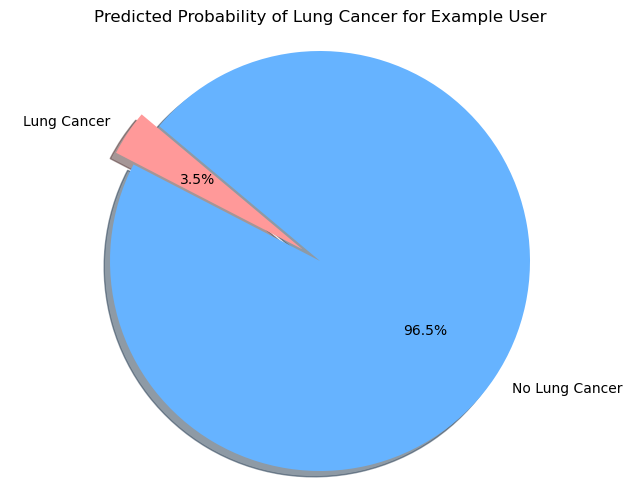

In [5]:
# Example user input (Yes = 2, No = 1)
user_input1 = {
    'GENDER': 0,  # 1 for Male, 0 for Female
    'AGE': 22,
    'SMOKING': 1,
    'YELLOW_FINGERS': 1,
    'ANXIETY': 1,
    'PEER_PRESSURE': 1,
    'CHRONIC DISEASE': 1,
    'FATIGUE': 1,
    'ALLERGY': 1,
    'WHEEZING': 1,
    'ALCOHOL CONSUMING': 1,
    'COUGHING': 1,
    'SHORTNESS OF BREATH': 1,
    'SWALLOWING DIFFICULTY': 1,
    'CHEST PAIN': 1
}

# Predict the probability for the example user
prob = predict_cancer_probability(user_input1)
print(f"Predicted Probability of Lung Cancer: {prob}")

# Plot the predicted probability for the example user input using a pie chart
plt.figure(figsize=(8, 6))
labels = ['Lung Cancer', 'No Lung Cancer']
sizes = [prob, 1 - prob]
colors = ['#ff9999','#66b3ff']
explode = (0.1, 0)  # explode 1st slice
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)
plt.title('Predicted Probability of Lung Cancer for Example User')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

Predicted Probability of Lung Cancer: 0.7357177959836776


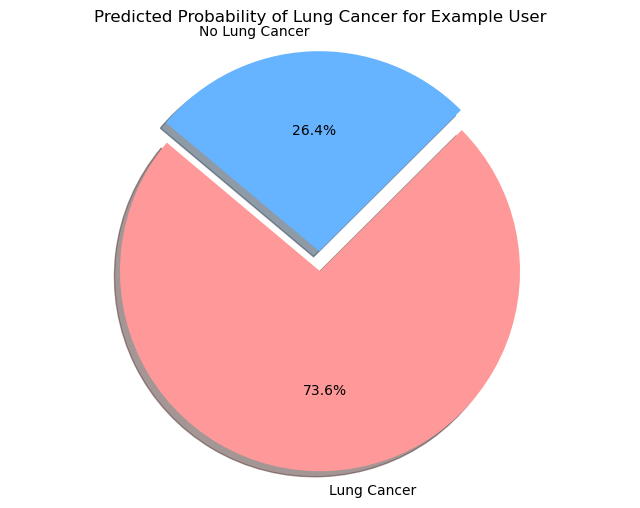

In [7]:
# Example user input (Yes = 2, No = 1)
user_input2 = {
    'GENDER': 0,  # 1 for Male, 0 for Female
    'AGE': 40,
    'SMOKING': 1,
    'YELLOW_FINGERS': 1,
    'ANXIETY': 2,
    'PEER_PRESSURE': 2,
    'CHRONIC DISEASE': 1,
    'FATIGUE': 2,
    'ALLERGY': 1,
    'WHEEZING': 2,
    'ALCOHOL CONSUMING': 1,
    'COUGHING': 2,
    'SHORTNESS OF BREATH': 1,
    'SWALLOWING DIFFICULTY': 1,
    'CHEST PAIN': 2
}

# Predict the probability for the example user
prob = predict_cancer_probability(user_input2)
print(f"Predicted Probability of Lung Cancer: {prob}")

# Plot the predicted probability for the example user input using a pie chart
plt.figure(figsize=(8, 6))
labels = ['Lung Cancer', 'No Lung Cancer']
sizes = [prob, 1 - prob]
colors = ['#ff9999','#66b3ff']
explode = (0.1, 0)  # explode 1st slice
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)
plt.title('Predicted Probability of Lung Cancer for Example User')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

Predicted Probability of Lung Cancer: 0.9989729285595577


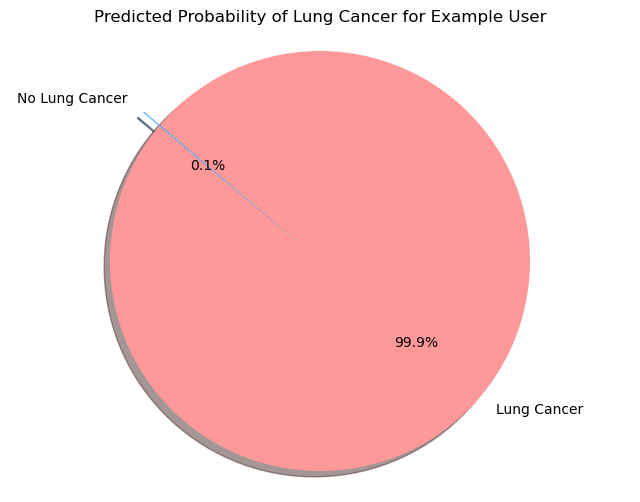

In [9]:
# Example user input (Yes = 2, No = 1)
user_input3 = {
    'GENDER': 0,  # 1 for Male, 0 for Female
    'AGE': 62,
    'SMOKING': 2,
    'YELLOW_FINGERS': 2,
    'ANXIETY': 2,
    'PEER_PRESSURE': 2,
    'CHRONIC DISEASE': 2,
    'FATIGUE': 2,
    'ALLERGY': 2,
    'WHEEZING': 2,
    'ALCOHOL CONSUMING': 2,
    'COUGHING': 2,
    'SHORTNESS OF BREATH': 2,
    'SWALLOWING DIFFICULTY': 2,
    'CHEST PAIN': 2
}

# Predict the probability for the example user
prob = predict_cancer_probability(user_input3)
print(f"Predicted Probability of Lung Cancer: {prob}")

# Plot the predicted probability for the example user input using a pie chart
plt.figure(figsize=(8, 6))
labels = ['Lung Cancer', 'No Lung Cancer']
sizes = [prob, 1 - prob]
colors = ['#ff9999','#66b3ff']
explode = (0.1, 0)  # explode 1st slice
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)
plt.title('Predicted Probability of Lung Cancer for Example User')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()